# Testing notebook for work carried out by George 

Owner: George Hine

email: ppygh3@nottingham.ac.uk

Set path and Imports:

In [94]:
import sys
sys.path.append('..')

In [95]:
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'

In [96]:
from gax import sersic
from gax.sersic import sersic_2d_linear_pix
from matplotlib import pyplot as plt
import jax
import jax.numpy as jnp
import astropy
import numpy as np
from astropy.table import Table, vstack
import gax.gax_fits as gfits
from astropy.io import fits

bands = np.array(['u','g','r','i','z'])

# Create Function that reads images from fits paths

In [97]:
file = '588017724937142430'

In [98]:
string = np.array(['/home/borge/Data/587722981742149718ua.fits.gz'])

In [99]:
image = gfits.Read(string[0])

In [100]:
image.shape

(72, 88)

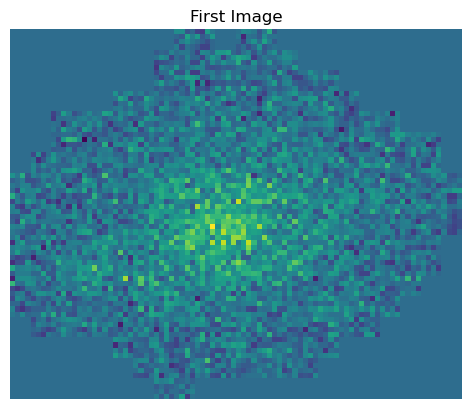

In [101]:
plt.figure()
plt.title('First Image')
plt.axis('off')
plt.imshow(image)

and opposite function to write to fits files

In [102]:
gfits.Write(image,'test_image.fits')

# Require function to read multiple files into multi-band composite images

In [103]:
loc = '/home/borge/Data/Test_fits/'
image = gfits.Read_M_band(file,loc)

['/home/borge/Data/Test_fits/588017724937142430ua.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ga.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ra.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ia.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430za.fits.gz']


In [104]:
image.shape

(400, 232, 5)

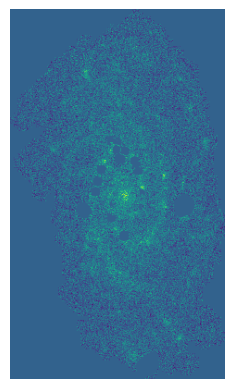

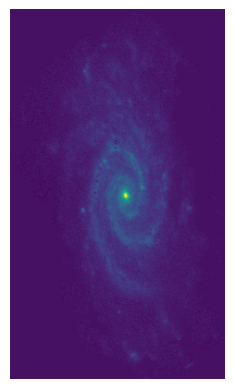

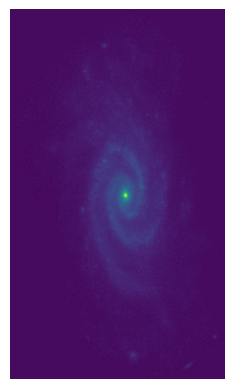

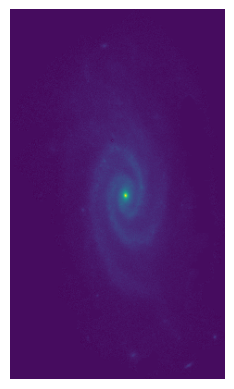

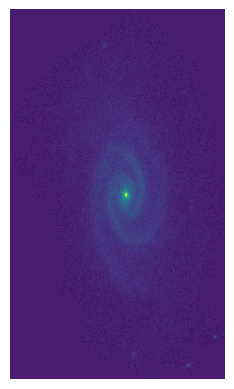

In [105]:
for i in range(0,5):
    plt.figure()
    plt.imshow(image[:,:,i])
    plt.axis('off')

# Now want to represent the multi-band images in RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'First RGB Image')

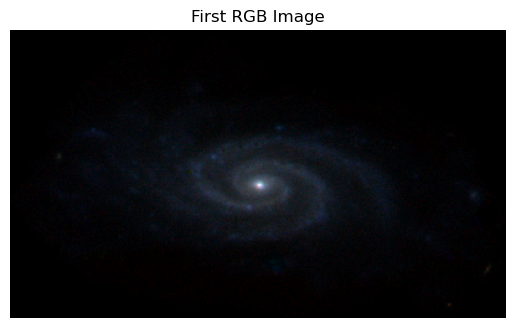

In [106]:
gfits.multi_band_imshow(image,4,2,1)
plt.title('First RGB Image')

# Create data set using the filenames

This will come in handy later, there is a `.bat` file which can be copied into folders and run to generate text documents of names that can be read into arrays in this way.

In [107]:
names_array = np.loadtxt('/home/borge/Data/object_list.txt').astype(int)
names_array = names_array.astype(str)
print(len(names_array))


29250


Create function for importing data set:

In [108]:
# Set up loop for reading combined files into arrays

#for i in range(0,3):
#    image = gfits.Read_M_band(names_array[i])
#    gfits.multi_band_imshow(image)

Want a function to calculate the total flux of the source


In [109]:
image[:,:,0]

array([[1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       ...,
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.]])

In [110]:
np.min(image[:,:,0])

982.0

In [111]:
f = gfits.source_flux(image,0)
f

1775168.0

# Show results of the ficl test on test data:


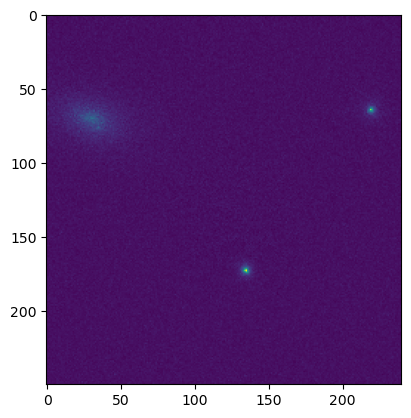

In [112]:
# Working image

img = gfits.Read('/home/borge/Data/working_image.fits')
plt.imshow(img)

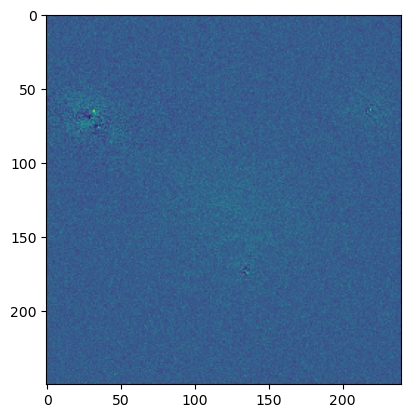

In [113]:
# Residuals 
img = gfits.Read('/home/borge/Data/residual.fits')
plt.imshow(img)

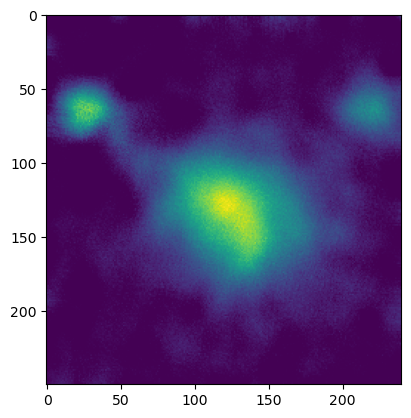

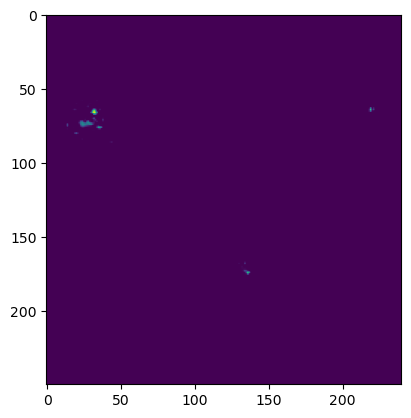

In [114]:
# large and small non_par
 
img1 = gfits.Read('/home/borge/Data/large_nonpar.fits')
plt.figure()
plt.imshow(img1)


img2 = gfits.Read('/home/borge/Data/small_nonpar.fits')
plt.figure()
plt.imshow(img2)

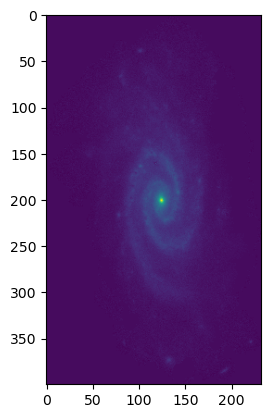

In [115]:
# input

img = gfits.Read('/home/borge/Data/588017724937142430ra.fits.gz')
plt.imshow(img)

In [116]:

# Model 

img = gfits.Read('/home/borge/ficl/ficl/test/data/model.fits')
plt.imshow(img)


FileNotFoundError: [Errno 2] No such file or directory: '/home/borge/ficl/ficl/test/data/model.fits'

# Run ficl on test spiral galaxy image

The source detection is failing on the test image.
Will attempt to run source detection on the test image in this notebook.


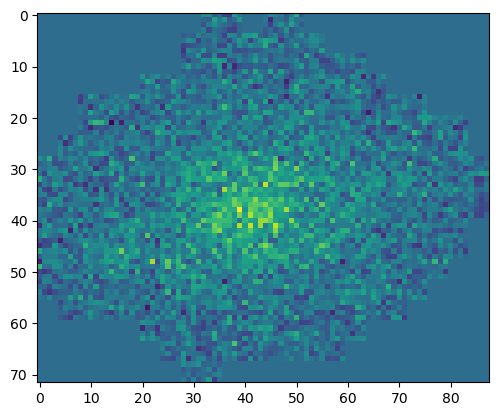

In [ ]:
# Display test image:
test = gfits.Read('/home/borge/ficl/ficl/test/data/test_image.fits')
plt.figure()
plt.imshow(test)

Test image is very noisey, will instead look for higher S/N image for use in testing.

In [ ]:
# Read in image
image = gfits.Read_M_band(file,loc)

# Write higher S/N image to fits file for use in ficl main running
gfits.Write(image[:,:,2],'High_SN_test_image.fits')


['/home/borge/Data/Test_fits/588017724937142430ua.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ga.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ra.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ia.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430za.fits.gz']


Will now try running the ficl code on the new image with higher S/N.

Still fails even with high S/N image.

Instead try running source detection on the image inside the notebook.

In [ ]:
import os
os.chdir

# Set working directory
import os
os.chdir(r'/home/borge/ficl')

import ficl.main as m

# The reason this waqs not working for ages is because the jupyter notebook
# was not in the ficl environment - it is now 
    

Function appears to take parameter dictionary and image as inputs and return the a table of sources within the image.

First require pars table:

In [ ]:
params = Table(names=['nsigma', 'background', 'smooth_sigma', 'smooth_size',
                      'detect_npixels', 'deblend_npixels', 'deblend_nlevels',
                      'deblend_contrast'])

p = Table(names=["x", "y", "flux", "sersic", "ellip", "pa", "re"])

Give pars tabel to estimate sources function

In [ ]:
# Appears that image has to be in fits file format rather than array
image = fits.open('/home/borge/ficl/ficl/test/data/test_image.fits')
image = image[0]
#m.estimate_source_param(image,p)

# erroring as it requires background if 2D to be the same shape as the 

Exploring errors

In [ ]:
# Want to see the information surrounding the input fits 
# to see what is different to the test image input

hdul = fits.open('/home/borge/ficl/ficl/test/data/input.fits')
#hdul[0].data
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  240                                                  
NAXIS2  =                  250                                                  
BUNIT   = 'electron'                                                            

In [ ]:
hdul = fits.open('/home/borge/ficl/ficl/test/data/test_image.fits')
#hdul[0].data
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   88                                                  
NAXIS2  =                   72                                                  
BSCALE  =                    1                                                  
BZERO   =                32768                                                  

So the headers are different but don't have any of the info needed for the functions

# Import main function to properly comment and work out process 

In [ ]:
def main(
    image_filename,
    uncertainty_filename,
    psf_filename,
    detection_parameters,
    sb_threshold,
    source_flux_limit,
    learning_rate,
    large_threshold,
    large_nsamples,
    large_scale_nonpar_rate,
    small_scale_nonpar_rate,
    psf_oversampling,
    max_iterations,
    warmup,
    output_path,
    save_iteration_frequency,
):
    
    
    original_image = read_image(image_filename) # Takes filename as argument
    
    
    add_uncertainty(
        original_image, uncertainty_filename, detection_parameters["background"]
    )
    
        
    psf = read_image_psf(psf_filename, psf_oversampling)
    
    mask = create_high_sb_mask(original_image, sb_threshold)
    
    sources = estimate_source_param(original_image, detection_parameters)
    
    sources = sources[sources["kron_flux"] >= source_flux_limit]
    # make initial sources slightly faint to avoid
    # over-subtracting ICL at start
    sources["kron_flux"] *= 0.95
    
    source_param = modeller.prepare_source_param(sources, original_image.shape)
    
    logger.info(f"Initial source parameters:\n{source_param}")
    
    lower_bounds, upper_bounds = modeller.set_bounds(original_image.shape)
    
    param_norm = modeller.get_param_norm(source_param)
    
    running_gradients = initial_running_gradients(source_param)
    
    running_square_gradients = initial_running_gradients(source_param)
    
    large_scales = initial_nonpar_image(original_image)
    
    small_scales = initial_nonpar_image(original_image)
    
    best_chisq_at_current_learning_rate = np.infty
    
    iterations_without_improvement = 0
    
    plateau_count = 0
    
    stop = False
    
    logger.info("Starting optimisation")
    for iteration in progress(range(1, max_iterations + 1), desc="Optimisation steps"):
        updates = optimisation_step(
            original_image,
            source_param,
            psf,
            mask,
            learning_rate,
            param_norm,
            running_gradients,
            running_square_gradients,
            lower_bounds,
            upper_bounds,
            large_scales,
            small_scales,
            large_threshold,
            large_nsamples,
            large_scale_nonpar_rate,
            small_scale_nonpar_rate,
            iteration,
            warmup,
            output_path,
            save_iteration_frequency,
        )
        if stop:
            break
        image, source_param, large_scales, small_scales, chisq = updates
        if chisq >= best_chisq_at_current_learning_rate:
            iterations_without_improvement += 1
        else:
            iterations_without_improvement = 0
            best_chisq_at_current_learning_rate = chisq
        if iterations_without_improvement >= 10:
            iterations_without_improvement = 0
            plateau_count += 1
            logger.info("chisq plateau, lowering rates")
            learning_rate /= 2
            large_scale_nonpar_rate /= 2
            small_scale_nonpar_rate /= 2
            large_threshold = int(large_threshold / 1.25)
            best_chisq_at_current_learning_rate = chisq
        if plateau_count >= 5:
            logger.info("stopping after next iteration")
            stop = True
            save_iteration_frequency = 1


def optimisation_step(
    original_image,
    source_param,
    psf,
    mask,
    learning_rate,
    param_norm,
    running_gradients,
    running_square_gradients,
    lower_bounds,
    upper_bounds,
    large_scale_nonpar_image,
    small_scale_nonpar_image,
    large_threshold,
    large_nsamples,
    large_scale_nonpar_rate,
    small_scale_nonpar_rate,
    iteration,
    warmup,
    output_path,
    save_iteration_frequency,
):
    image = subtract_nonpar_image(
        original_image, large_scale_nonpar_image, small_scale_nonpar_image
    )
    source_param, chisq, gradients = update_source_param(
        source_param,
        learning_rate,
        image,
        psf,
        mask,
        param_norm,
        running_gradients,
        running_square_gradients,
        lower_bounds,
        upper_bounds,
        iteration,
    )
    residual = large_scale_residuals = small_scale_residuals = None
    if iteration >= warmup:
        logger.debug(f"original_image.shape: {original_image.shape}")
        residual = modeller.model_residual_image(original_image, source_param, psf)
        logger.debug(f"residual.shape: {residual.shape}")
        if large_scale_nonpar_rate > 0:
            large_scale_residuals = select_large_scales(
                residual, large_threshold, large_nsamples
            )
            logger.debug(f"large_scale_residuals.shape: {large_scale_residuals.shape}")
            large_scale_nonpar_image = update_nonpar_image(
                large_scale_nonpar_image, large_scale_residuals, large_scale_nonpar_rate
            )
        if small_scale_nonpar_rate > 0:
            small_scale_residuals = select_small_scales(residual, large_scale_residuals)
            logger.debug(f"small_scale_residuals.shape: {small_scale_residuals.shape}")
            small_scale_nonpar_image = update_nonpar_image(
                small_scale_nonpar_image, small_scale_residuals, small_scale_nonpar_rate
            )
    if output_path and iteration % save_iteration_frequency == 0:
        save_iteration(
            output_path,
            iteration,
            image,
            source_param,
            gradients,
            residual,
            large_scale_residuals,
            small_scale_residuals,
            large_scale_nonpar_image,
            small_scale_nonpar_image,
        )
    logger.info(
        f"Iteration {iteration}: chisq = {chisq}, "
        f"large nonpar flux = {large_scale_nonpar_image.data.sum()}, "
        f"small nonpar flux = {small_scale_nonpar_image.data.sum()}, "
        f"learning rate = {learning_rate}"
    )
    return (
        image,
        source_param,
        large_scale_nonpar_image,
        small_scale_nonpar_image,
        chisq,
    )

Interested to see what the estimated sources fits looks like

In [ ]:

# estimated sources

est_fits = fits.open('/home/borge/ficl/ficl/test/data/estimated_source_param_gax.fits')
est_fits[1].data

FITS_rec([(0.30103, 0.67679411,  -9.13456722, 0.91964083,  1.32965559,  99.96639912, -60.12307326),
          (0.30103, 0.5514916 ,  -9.11335662, 0.88648899,  1.35684362,  15.17837817,  48.0932318 ),
          (0.30103, 1.43713064, -11.39242607, 0.58570552,  0.23614186, -89.63260032, -55.21925673),
          (0.30103, 1.2744667 , -10.19261551, 0.82531065, -0.45404773, -83.99070603, -45.28885478)],
         dtype=(numpy.record, [('log_n', '>f8'), ('log_re', '>f8'), ('mag', '>f8'), ('q', '>f8'), ('theta', '>f8'), ('x', '>f8'), ('y', '>f8')]))

so clearly astropy table in fits file

# aha! 

[('log_n', '>f8'), ('log_re', '>f8'), ('mag', '>f8'), ('q', '>f8'), ('theta', '>f8'), ('x', '>f8'), ('y', '>f8')]


# Steven says we should create a source catalogue for images

want to check information isn't listed in the original fits files

In [ ]:
path = '/home/borge/Data/gz2and1master.fits.gz'
hdul = fits.open(path)

In [ ]:
# Want to see headers in the table
data = hdul[1].data

data.dtype



dtype((numpy.record, [('OBJID', '>i8'), ('OBJID_STR', 'S20'), ('RUN', '>i2'), ('RERUN', '>i2'), ('CAMCOL', '>i2'), ('FIELD', '>i2'), ('OBJ', '>i2'), ('RA', '>f8'), ('DEC', '>f8'), ('PETROR50_R', '>f4'), ('PETROR90_R', '>f4'), ('PETROMAG_U', '>f4'), ('PETROMAG_G', '>f4'), ('PETROMAG_R', '>f4'), ('PETROMAG_I', '>f4'), ('PETROMAG_Z', '>f4'), ('PETROMAGERR_U', '>f4'), ('PETROMAGERR_G', '>f4'), ('PETROMAGERR_R', '>f4'), ('PETROMAGERR_I', '>f4'), ('PETROMAGERR_Z', '>f4'), ('PSFMAG_R', '>f4'), ('FIBERMAG_R', '>f4'), ('DEVMAG_R', '>f4'), ('DEVMAGERR_R', '>f4'), ('EXPMAG_R', '>f4'), ('EXPMAGERR_R', '>f4'), ('FRACDEV_R', '>f4'), ('MU50_R', '>f8'), ('EXTINCTION_U', '>f4'), ('EXTINCTION_G', '>f4'), ('EXTINCTION_R', '>f4'), ('EXTINCTION_I', '>f4'), ('EXTINCTION_Z', '>f4'), ('ROWC_U', '>f4'), ('COLC_U', '>f4'), ('ROWC_G', '>f4'), ('COLC_G', '>f4'), ('ROWC_R', '>f4'), ('COLC_R', '>f4'), ('ROWC_I', '>f4'), ('COLC_I', '>f4'), ('ROWC_Z', '>f4'), ('COLC_Z', '>f4'), ('CMODELMAG_R', '>f8'), ('CMODELMAGERR_

In [ ]:
# Filter data by face on using Boolean flags and masking

mask_gz1 = data['gz1_arms_clean'] == True
mask_gz2 = data['gz2_arms_clean'] == True
mask = mask_gz1 + mask_gz2
face_on_master_fits = data[mask]

len(face_on_master_fits)

# so 29250 face on images!

29251

# Wish to calculate parameters for source catalogue from image

- centroid
- kron_flux
- sersic
- ellipticity
- orientation


In [ ]:
# Centroid function

def centroid(img):
    """First moment of the flux distribution.

    Parameters
    ----------
    img : numpy or jax array

    Returns
    -------
    x, y : floats
        The calculated centroid position.
    """
    x_cen = (np.arange(img.shape[0]) * img.sum(1) / img.sum()).sum()
    y_cen = (np.arange(img.shape[1]) * img.sum(0) / img.sum()).sum()
    return x_cen, y_cen

In [ ]:
composite = gfits.Read_M_band(file,loc)
composite_centroids = np.empty((2,composite.shape[2])) 
for i in range(0,composite.shape[2]):
    x,y = centroid(composite[:,:,i])
    composite_centroids[0:i] = x
    composite_centroids[1:i] = y

['/home/borge/Data/Test_fits/588017724937142430ua.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ga.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ra.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ia.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430za.fits.gz']


In [ ]:
composite_centroids

# All the same - good 

array([[199.49269852, 199.49269852, 199.49269852, 199.49269852,
        199.49269852],
       [115.53492266, 115.53492266, 115.53492266, 115.53492266,
        115.53492266]])

want to work out rough flux:

In [ ]:
composite_flux = np.empty(composite.shape[2])

for i in range(0,composite.shape[2]):    
    composite_flux[i] = gfits.source_flux_minus_background(composite,i)
    

In [ ]:
composite_flux

array([1775150., 2632286., 3142423., 3839151., 1771140.])

## Create rough estimates for other parameters:

- sersic = measure of how exponential the photometric profile is
- ellipticity = measure of how oblate the object is in reference to a circle
- orientation = angle of semi majour north to east
- re = estimate of half light radius


In [ ]:
# Want to threshold the image in order to reveal elliptical shape
threshold_composite_mask = np.empty(composite.shape)
for i in range(0,composite.shape[2]):
    val = np.mean(composite[:,:,i]) + np.std(composite[:,:,i])
    threshold_image_mask = gfits.threshold_image(composite[:,:,i],val)
    threshold_composite_mask[:,:,i] = threshold_image_mask
    



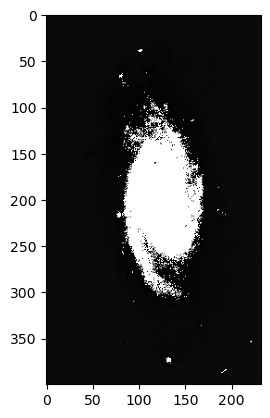

In [ ]:
plt.figure()
plt.imshow(-1*threshold_composite_mask[:,:,2],'gray')
plt.savefig('spyder_export.png',dpi='figure')

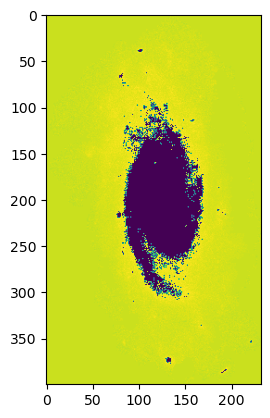

In [ ]:
# Apply threshold mask to image

plt.figure()
plt.imshow(composite[:,:,2]*threshold_composite_mask[:,:,2],'viridis')
plt.clim(np.min(composite[:,:,2][np.nonzero(composite[:,:,2])]))

In [ ]:
np.min(composite[:,:,2]*threshold_composite_mask[:,:,2])

1.0

In [ ]:
# Approximate values

a = 65-22 # majour
b = 50 - 27 # minor
ellipticity = (a-b)/a

 

In [ ]:
ellipticity

0.46511627906976744

In [ ]:
orientation = 90 # basically horizontal
sersic_val = 1.5 # guess

In [ ]:
# Create new parameter dictionary
cat = Table(
        names=[
            "xcentroid",
            "ycentroid",
            "kron_flux",
            "sersic",
            "ellipticity",
            "orientation",
            "re",
        ],
        rows=[
            [composite_centroids[0,2], composite_centroids[1,2], composite_flux[2], sersic_val, ellipticity, orientation, a*0.75],
        ],
    )

In [ ]:
cat

xcentroid,ycentroid,kron_flux,sersic,ellipticity,orientation,re
float64,float64,float64,float64,float64,int64,float64
199.4926985217898,115.53492265826799,3142423.0,1.5,0.46511627906976744,90,32.25


now need to prepare the catalogue to params

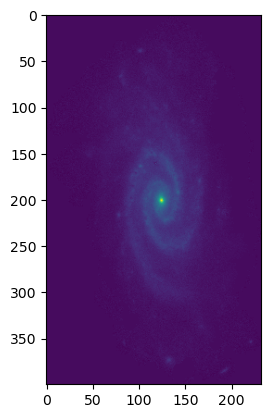

In [ ]:
view = gfits.Read('/home/borge/Data/588017724937142430ra.fits.gz')
plt.imshow(view)

# Now need to make a psf

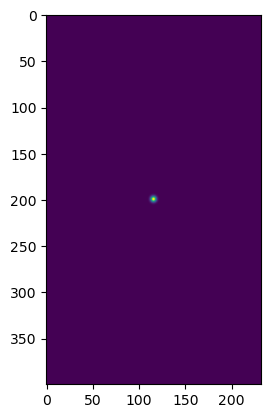

In [ ]:
psf = gfits.gaussian_psf(composite[:,:,2],2,2,True)
plt.imshow(psf)
gfits.Write(psf,'psf.fits')


In [ ]:
psf_oversampling = 0
psf = m.read_image_psf('/home/borge/ficl/ficl/test/data/psf.fits',psf_oversampling)

#plt.imshow(psf.data) #checking it has got the right one

# need uncertainty file


In [ ]:
uncertainty_0 = np.zeros(image.shape)
gfits.Write(uncertainty_0,'uncertain.fits')


# Checking it worked
#uncert = gfits.Read('/home/borge/ficl/ficl/test/data/uncertain.fits')
#plt.imshow(uncert.data)

# Trying to run main on our image!

In [ ]:
# Set basic inputs

image_filename = '/home/borge/ficl/ficl/test/data/587722981742149718ga.fits.gz'
uncertainty_filename = '/home/borge/ficl/uncertain.fits'
psf_filename = '/home/borge/ficl/ficl/test/data/psf.fits'
psf_oversampling = 1
output_path = '/home/borge/Data'

original_image = m.read_image(image_filename)
psf = m.read_image_psf(psf_filename, psf_oversampling)

# Remove uncertainty step as image is already uncertain
# m.add_uncertainty(original_image, uncertainty_filename, detection_parameters["background"])

sources = cat # set source catalogue to estimates

sources["kron_flux"] *= 0.95



In [ ]:
import ficl.modeller_gax as modeller

# Pre processing

source_param = modeller.prepare_source_param(sources, original_image.shape)
lower_bounds, upper_bounds = modeller.set_bounds(original_image.shape)
param_norm = modeller.get_param_norm(source_param)
running_gradients = m.initial_running_gradients(source_param)
running_square_gradients = m.initial_running_gradients(source_param)
large_scales = m.initial_nonpar_image(original_image)
small_scales = m.initial_nonpar_image(original_image)
best_chisq_at_current_learning_rate = np.infty
iterations_without_improvement = 0
plateau_count = 0

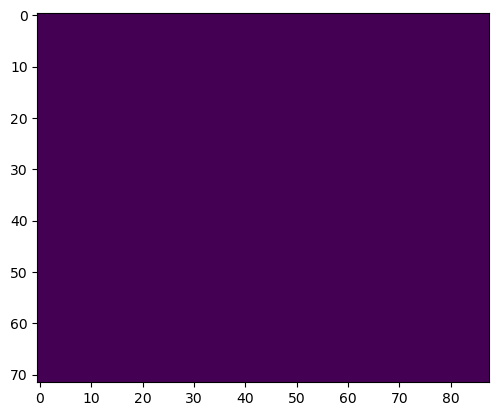

In [ ]:
# Cell exploring pre-processing:
plt.imshow(small_scales)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['/home/borge/Data/Test_fits/588017724937142430ua.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ga.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ra.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430ia.fits.gz']
['/home/borge/Data/Test_fits/588017724937142430za.fits.gz']


Text(0.5, 1.0, 'Good Spiral RGB')

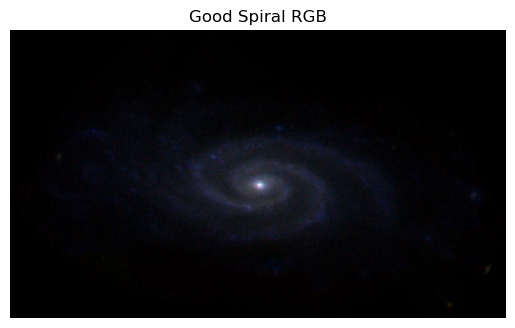

In [ ]:
good_spiral = '588017724937142430'
path = '/home/borge/Data/Test_fits/'
comp = gfits.Read_M_band(good_spiral,path)
gfits.multi_band_imshow(comp,4,3,1)
plt.title('Good Spiral RGB')

### Testing updates to functions


In [ ]:
x,y = centroid(comp[:,:,1])

In [ ]:
x,y

(199.4565852922682, 115.59633435737365)

## Demonstrating ficl running on spiral galaxy:

- Code is up and running!
- first worked on test image: 588017724937142430ra.fits.gz

In [ ]:
working_image = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ra/0200/working_image.fits')
residual = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ra/0200/residual.fits')
large_nonpar = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ra/0200/large_nonpar.fits')
small_nonpar = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ra/0200/small_nonpar.fits')


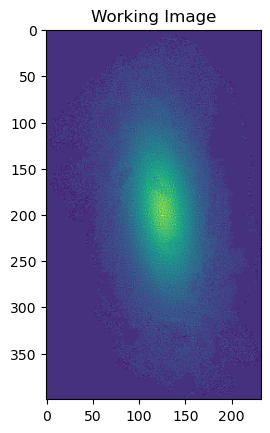

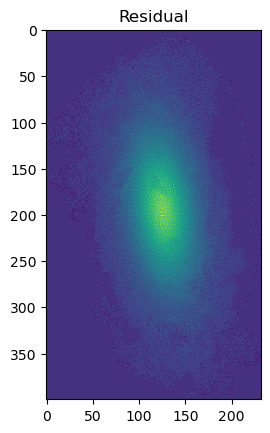

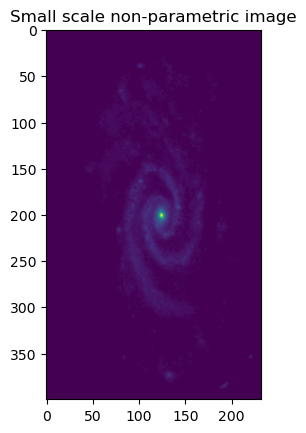

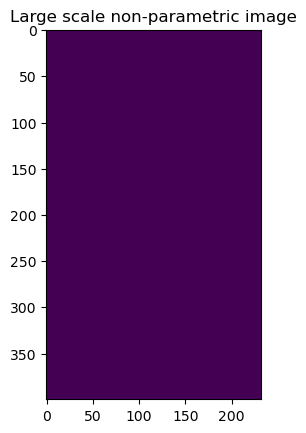

In [ ]:
plt.figure()
plt.title('Working Image')
plt.imshow(working_image)

plt.figure()
plt.title('Residual')
plt.imshow(working_image)

plt.figure()
plt.title('Small scale non-parametric image')
plt.imshow(small_nonpar)


plt.figure()
plt.title('Large scale non-parametric image')
plt.imshow(large_nonpar)

Text(0.5, 1.0, 'Original image')

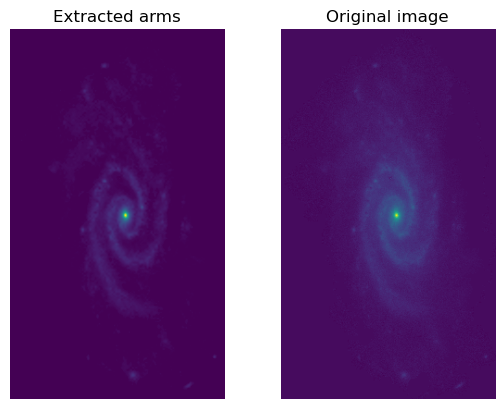

In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(small_nonpar)
ax[0].axis('off')
ax[0].set_title('Extracted arms')
ax[1].imshow(view)
ax[1].axis('off')
ax[1].set_title('Original image')


In [ ]:
# Now require a function to create a config file from a filename
#def Generate_config(filename,location):
filename = '588017724937142430ua.fits.gz'
location = '/home/borge/Data/'
file = filename.removesuffix('.fits.gz')

document = """image_filename = loc_filename_
#psf_filename = None
output_path = /home/borge/Data/Output_Data/file_
psf_oversampling = 1
sb_threshold = 0
source_flux_limit = 0
learning-rate = 0.05
large_threshold = 50
large_nsamples = 25
large_scale_nonpar_rate = 0
small_scale_nonpar_rate = 0.05
max_iterations = 204
warmup = 3
modeller = gax
gax_integration_order = 3
save_iteration_frequency = 100
loglevel = DEBUG
nsigma = 1.0
background = 1000.0
smooth_sigma = 3.0
smooth_size = 25.0
detect_npixels = 1000
deblend_npixels = 1000
deblend_nlevels = 1
deblend_contrast = 1 
"""
doc1 = document.replace('loc_',str(location),1)
doc2 = doc1.replace('filename_',str(filename),1)
doc3 = doc2.replace('file_',str(file),1)

print(doc3)

image_filename = /home/borge/Data/588017724937142430ua.fits.gz
#psf_filename = None
output_path = /home/borge/Data/Output_Data/588017724937142430ua
psf_oversampling = 1
sb_threshold = 0
source_flux_limit = 0
learning-rate = 0.05
large_threshold = 50
large_nsamples = 25
large_scale_nonpar_rate = 0
small_scale_nonpar_rate = 0.05
max_iterations = 204
warmup = 3
modeller = gax
gax_integration_order = 3
save_iteration_frequency = 100
loglevel = DEBUG
nsigma = 1.0
background = 1000.0
smooth_sigma = 3.0
smooth_size = 25.0
detect_npixels = 1000
deblend_npixels = 1000
deblend_nlevels = 1
deblend_contrast = 1 



In [ ]:
# Now require method of writing to a .yml file

# specify the name of your output file
output_file = 'my_file.txt'

# specify the string you want to write to the file
doc3

# open the file for writing and write the string to the file
with open(output_file, 'w') as file:
    file.write(doc3)


In [ ]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: /home/borge/ficl


In [ ]:
doc3

'image_filename = /home/borge/Data/588017724937142430ua.fits.gz\n#psf_filename = None\noutput_path = /home/borge/Data/Output_Data/588017724937142430ua\npsf_oversampling = 1\nsb_threshold = 0\nsource_flux_limit = 0\nlearning-rate = 0.05\nlarge_threshold = 50\nlarge_nsamples = 25\nlarge_scale_nonpar_rate = 0\nsmall_scale_nonpar_rate = 0.05\nmax_iterations = 204\nwarmup = 3\nmodeller = gax\ngax_integration_order = 3\nsave_iteration_frequency = 100\nloglevel = DEBUG\nnsigma = 1.0\nbackground = 1000.0\nsmooth_sigma = 3.0\nsmooth_size = 25.0\ndetect_npixels = 1000\ndeblend_npixels = 1000\ndeblend_nlevels = 1\ndeblend_contrast = 1 \n'

In [ ]:
type(doc3)


str

In [ ]:
print(doc3)

image_filename = /home/borge/Data/588017724937142430ua.fits.gz
#psf_filename = None
output_path = /home/borge/Data/Output_Data/588017724937142430ua
psf_oversampling = 1
sb_threshold = 0
source_flux_limit = 0
learning-rate = 0.05
large_threshold = 50
large_nsamples = 25
large_scale_nonpar_rate = 0
small_scale_nonpar_rate = 0.05
max_iterations = 204
warmup = 3
modeller = gax
gax_integration_order = 3
save_iteration_frequency = 100
loglevel = DEBUG
nsigma = 1.0
background = 1000.0
smooth_sigma = 3.0
smooth_size = 25.0
detect_npixels = 1000
deblend_npixels = 1000
deblend_nlevels = 1
deblend_contrast = 1 



In [ ]:
import os

# specify the name of the file you want to rename
old_filename = 'my_file.txt'

# get the filename without the extension
base = os.path.splitext(old_filename)[0]

# specify the new filename with the .yml extension
new_filename = base + '.yml'

# rename the file
os.rename(old_filename, new_filename)


In [ ]:
# Now combine into a funtion:
import os
import shutil

def Generate_config(filename,location,output_path):
    
    # Remove file information from filename
    file = filename.removesuffix('.fits.gz')

    # Create a basic string of the config file
    document = """image_filename = loc_/filename_
    #psf_filename = None
    output_path = /home/borge/Data/Output_Data/file_
    psf_oversampling = 1
    sb_threshold = 0
    source_flux_limit = 0
    learning-rate = 0.05
    large_threshold = 50
    large_nsamples = 25
    large_scale_nonpar_rate = 0
    small_scale_nonpar_rate = 0.05
    max_iterations = 204
    warmup = 3
    modeller = gax
    gax_integration_order = 3
    save_iteration_frequency = 100
    loglevel = DEBUG
    nsigma = 1.0
    background = 1000.0
    smooth_sigma = 3.0
    smooth_size = 25.0
    detect_npixels = 1000
    deblend_npixels = 1000
    deblend_nlevels = 1
    deblend_contrast = 1 
    """
    # Replace basic componenents with specified variables
    doc1 = document.replace('loc_',str(location),1)
    doc2 = doc1.replace('filename_',str(filename),1)
    doc3 = doc2.replace('file_',str(file),1)
    
    # specify the name of your output file
    output_file = 'file__config.txt'
    output_file = output_file.replace('file_',file,1)

    # specify the string you want to write to the file
    doc3

    # open the file for writing and write the string to the file
    with open(output_file, 'w') as file:
        file.write(doc3)
        
    # specify the name of the file you want to rename
    old_filename = output_file

    # get the filename without the extension
    base = os.path.splitext(old_filename)[0]

    # specify the new filename with the .yml extension
    new_filename = base + '.yml'

    # rename the file
    os.rename(old_filename, new_filename)
    
    # specify the name of the directory you want to move the files to
    destination_dir = output_path

    # get a list of files in the current working directory
    files = os.listdir()

    # loop through each file and move it to the destination directory
    for file in files:
        if os.path.isfile(output_file):
            shutil.move(file, os.path.join(destination_dir, file))
    
    print('config_file_created: {}'.format(new_filename))    
            
    
    
    
    
    

In [ ]:
Generate_config('588017724937142430ua.fits.gz','/home/borge/Data','/home/borge/Data/Config_files')

# Success!

# Now will move function to gfits

gfits.Generate_config('588017724937142430ua.fits.gz','/home/borge/Data','/home/borge/Data/Config_files')


config_file_created: 588017724937142430ua_config.yml
config_file_created: 588017724937142430ua_config.yml


In [ ]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: /home/borge/ficl


In [ ]:
# Would be nicer to have a function which can generate the config files for all the bands at once instead of one at a time
image_name = '588017724937142430'
band_suffix = np.array(['ua.fits.gz','ga.fits.gz','ra.fits.gz','ia.fits.gz','za.fits.gz'],dtype=str)
filenames = np.empty(len(bands)).astype(str)

for i in range(0,len(filenames)):
    filenames[i] = str(image_name + band_suffix[i])

location = '/home/borge/Data'
output = '/home/borge/Data/Config_files'

#image_name + band_suffix[0]
filenames
    

array(['588017724937142430ua.fits.gz', '588017724937142430ga.fits.gz',
       '588017724937142430ra.fits.gz', '588017724937142430ia.fits.gz',
       '588017724937142430za.fits.gz'], dtype='<U32')

In [ ]:
image_name + band_suffix[0]

'588017724937142430ua.fits.gz'

In [ ]:
def Generate_config_M_band(name,input_path,output_path):
    band_suffix = np.array(['ua.fits.gz','ga.fits.gz','ra.fits.gz','ia.fits.gz','za.fits.gz'],dtype=str)
    filenames = np.empty(len(bands)).astype(str)

    for i in range(0,len(filenames)):
       filenames[i] = str(name + band_suffix[i])
    
    for i in range(0,len(filenames)):
        Generate_config(filenames[i],input_path,output_path)
        

In [ ]:
#Generate_config_M_band('588017724937142430','/home/borge/Data','/home/borge/Data/Config_files')
# Success!

# Moving to gfits
gfits.Generate_config_M_band('588017724937142430','/home/borge/Data','/home/borge/Data/Config_files')

config_file_created: 588017724937142430ua_config.yml
config_file_created: 588017724937142430ga_config.yml
config_file_created: 588017724937142430ra_config.yml
config_file_created: 588017724937142430ia_config.yml
config_file_created: 588017724937142430za_config.yml
config_file_created: 588017724937142430ua_config.yml
config_file_created: 588017724937142430ga_config.yml
config_file_created: 588017724937142430ra_config.yml
config_file_created: 588017724937142430ia_config.yml
config_file_created: 588017724937142430za_config.yml


In [ ]:
# Now wish to make composite from arm isolated images to display in RGB
u = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ua/0135/small_nonpar.fits')

g = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ga/0200/small_nonpar.fits')

r = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ra/0200/small_nonpar.fits')

i = gfits.Read('/home/borge/Data/Output_Data/588017724937142430ia/0188/small_nonpar.fits')

z = gfits.Read('/home/borge/Data/Output_Data/588017724937142430za/0200/small_nonpar.fits')

Composite_isolated = np.stack([u,g,r,i,z]).T


In [ ]:
Composite_isolated.shape


(232, 400, 5)

Text(0.5, 1.0, 'Isolated arms RGB image')

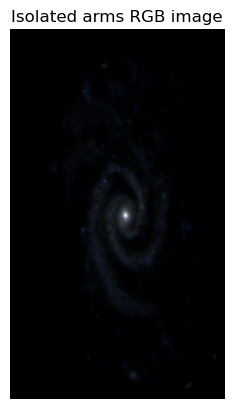

In [ ]:
gfits.multi_band_imshow(Composite_image=Composite_isolated,R_band=3,G_band=2,B_band=1)
plt.title('Isolated arms RGB image')

In [ ]:

# Specify the location where you want to create the folder
folder_path = "/home/borge/Data"

# Create the folder named "john" in the specified location
os.makedirs(os.path.join(folder_path, "john"))

In [ ]:
def create_folder(location,folder_name):
    os.makedirs(os.path.join(location, folder_name))

In [ ]:
create_folder("/home/borge/Data","john")

In [ ]:
# late night fuckign everything up lol

def Generate_config(filename,location,config_path):
    """Generate a config file from a given filename and location, and write it to a .yml file.

    Parameters:
        filename (str): The name of the file to generate the config file for.
        location (str): The location of the file to generate the config file for.
        output_path (str): The directory to write the ficl output files to.

    Returns:
        None
    """
    # Remove file information from filename
    file_ = filename.removesuffix('.fits.gz')
    create_folder('/home/borge/Data/Output_Data/',file_)
    output_path = '/home/borge/Data/Output_Data/' + str(file_)

    # Create a basic string of the config file
    document = """image_filename = loc_/filename_
    #psf_filename = None
    output_path = /home/borge/Data/Output_Data/file_
    psf_oversampling = 1
    sb_threshold = 0
    source_flux_limit = 0
    learning-rate = 0.05
    large_threshold = 50
    large_nsamples = 25
    large_scale_nonpar_rate = 0
    small_scale_nonpar_rate = 0.05
    max_iterations = 204
    warmup = 3
    modeller = gax
    gax_integration_order = 3
    save_iteration_frequency = 100
    loglevel = DEBUG
    nsigma = 1.0
    background = 1000.0
    smooth_sigma = 3.0
    smooth_size = 25.0
    detect_npixels = 1000
    deblend_npixels = 1000
    deblend_nlevels = 1
    deblend_contrast = 1 
    """
    # Replace basic componenents with specified variables
    doc1 = document.replace('loc_',str(location),1)
    doc2 = doc1.replace('filename_',str(filename),1)
    doc3 = doc2.replace('file_',str(file),1)
    
    # specify the name of your output file
    config_file = 'file__config.txt'
    config_file = config_file.replace('file_',file_,1)

    # specify the string you want to write to the file
    doc3

    # open the file for writing and write the string to the file
    with open(output_file, 'w') as file:
        file.write(doc3)
        
    # specify the name of the file you want to rename
    old_filename = config_file

    # get the filename without the extension
    base = os.path.splitext(old_filename)[0]

    # specify the new filename with the .yml extension
    new_filename = base + '.yml'

    # rename the file
    os.rename(old_filename, new_filename)
    
    # specify the name of the directory you want to move the files to
    destination_dir = config_path
         
    # get a list of files in the current working directory
    files = os.listdir(os.getcwd())

    # loop through each file and move it to the destination directory
    for file in files:
        if os.path.isfile(new_filename):
            shutil.move(new_filename, os.path.join(destination_dir, new_filename))
    
    print('config_file_created: {}'.format(new_filename))

In [ ]:
#Generate_config('100ua.fits.gz','/home/borge/Data','/home/borge/Data/Config_files')

In [ ]:

os.listdir(os.getcwd())

['.git',
 'ficl',
 'good_spirals',
 '.pre-commit-config.yaml',
 'High_SN_test_image.fits',
 'plot_example.ipynb',
 'ficl_config_good_spirals',
 '.gitignore',
 'file__config.yml',
 'spyder_export.png',
 'make_ims.py',
 '.coverage',
 'uncertain.fits',
 '100ua_config.yml',
 'environment.yml',
 'my_file.yml',
 'reports',
 'pyproject.toml',
 'README.md',
 'test_image.fits',
 '.benchmarks',
 'psf.fits',
 '.pytest_cache']

In [ ]:
# calculate background in image

background = u[0,0]
background

NameError: name 'u' is not defined